In [14]:
    import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
    

In [15]:
df=pd.read_csv(r'C:/Users/Lenovo/Desktop/PythonProjects/abp_accel.csv')


In [16]:
df.head(20)

,timestamp,x,y,z
0,2015-06-12 13:30:00.161041,100,620,804
1,2015-06-12 13:30:00.260490,68,640,800
2,2015-06-12 13:30:00.359939,48,628,884
3,2015-06-12 13:30:00.459388,44,616,888
4,2015-06-12 13:30:00.558837,76,628,860
5,2015-06-12 13:30:00.658286,104,616,868
6,2015-06-12 13:30:00.757735,120,596,868
7,2015-06-12 13:30:00.857184,136,612,812
8,2015-06-12 13:30:00.956633,164,624,840
9,2015-06-12 13:30:01.056082,168,596,840


In [17]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')



In [18]:
df.sort_values(by='timestamp',ascending=True,inplace=True)

In [19]:
df=df.set_index('timestamp')

In [20]:
df.head()

,x,y,z
timestamp,,,
2015-06-12 13:30:00.161041,100,620,804
2015-06-12 13:30:00.260490,68,640,800
2015-06-12 13:30:00.359939,48,628,884
2015-06-12 13:30:00.459388,44,616,888
2015-06-12 13:30:00.558837,76,628,860


In [21]:
#Resampling data based on Seconds,Minute,Hour,Daily

In [22]:
df_second=df.resample('5S').mean()#Taking the sample data of 5 seconds

In [23]:
df_second.head()

,x,y,z
timestamp,,,
2015-06-12 13:30:00,87.673469,605.142857,848.326531
2015-06-12 13:30:05,-636.480000,420.640000,664.160000
2015-06-12 13:30:10,-747.607843,375.137255,607.137255
2015-06-12 13:30:15,-791.920000,308.800000,590.480000
2015-06-12 13:30:20,-740.160000,432.400000,569.600000


In [24]:
#24 hour data visualization

In [25]:
st_date=pd.to_datetime('2015-06-12 00:00:00')

In [26]:
end_date=pd.to_datetime('2015-06-13 00:00:00')

In [27]:
df_24_hrs=df_second[(df_second.index >= st_date) & (df_second.index <= end_date)]

In [28]:
df_24_hrs

,x,y,z
timestamp,,,
2015-06-12 13:30:00,87.673469,605.142857,848.326531
2015-06-12 13:30:05,-636.480000,420.640000,664.160000
2015-06-12 13:30:10,-747.607843,375.137255,607.137255
2015-06-12 13:30:15,-791.920000,308.800000,590.480000
2015-06-12 13:30:20,-740.160000,432.400000,569.600000
...,...,...,...
2015-06-12 23:59:40,379.280000,757.760000,630.880000
2015-06-12 23:59:45,380.941176,759.921569,629.960784
2015-06-12 23:59:50,403.600000,760.160000,615.680000


In [29]:
#Acceleration

In [30]:
# Assuming df_24_hrs is your DataFrame
df_24_hrs.loc[:, 'Acceleration'] = np.sqrt(df_24_hrs['x']**2 + df_24_hrs['y']**2 + df_24_hrs['z']**2)



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32\3483677441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_24_hrs.loc[:, 'Acceleration'] = np.sqrt(df_24_hrs['x']**2 + df_24_hrs['y']**2 + df_24_hrs['z']**2)


In [31]:
df_24_hrs

,x,y,z,Acceleration
timestamp,,,,
2015-06-12 13:30:00,87.673469,605.142857,848.326531,1045.725785
2015-06-12 13:30:05,-636.480000,420.640000,664.160000,1011.510408
2015-06-12 13:30:10,-747.607843,375.137255,607.137255,1033.567169
2015-06-12 13:30:15,-791.920000,308.800000,590.480000,1034.969254
2015-06-12 13:30:20,-740.160000,432.400000,569.600000,1029.199080
...,...,...,...,...
2015-06-12 23:59:40,379.280000,757.760000,630.880000,1056.438882
2015-06-12 23:59:45,380.941176,759.921569,629.960784,1058.039489
2015-06-12 23:59:50,403.600000,760.160000,615.680000,1058.205107


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


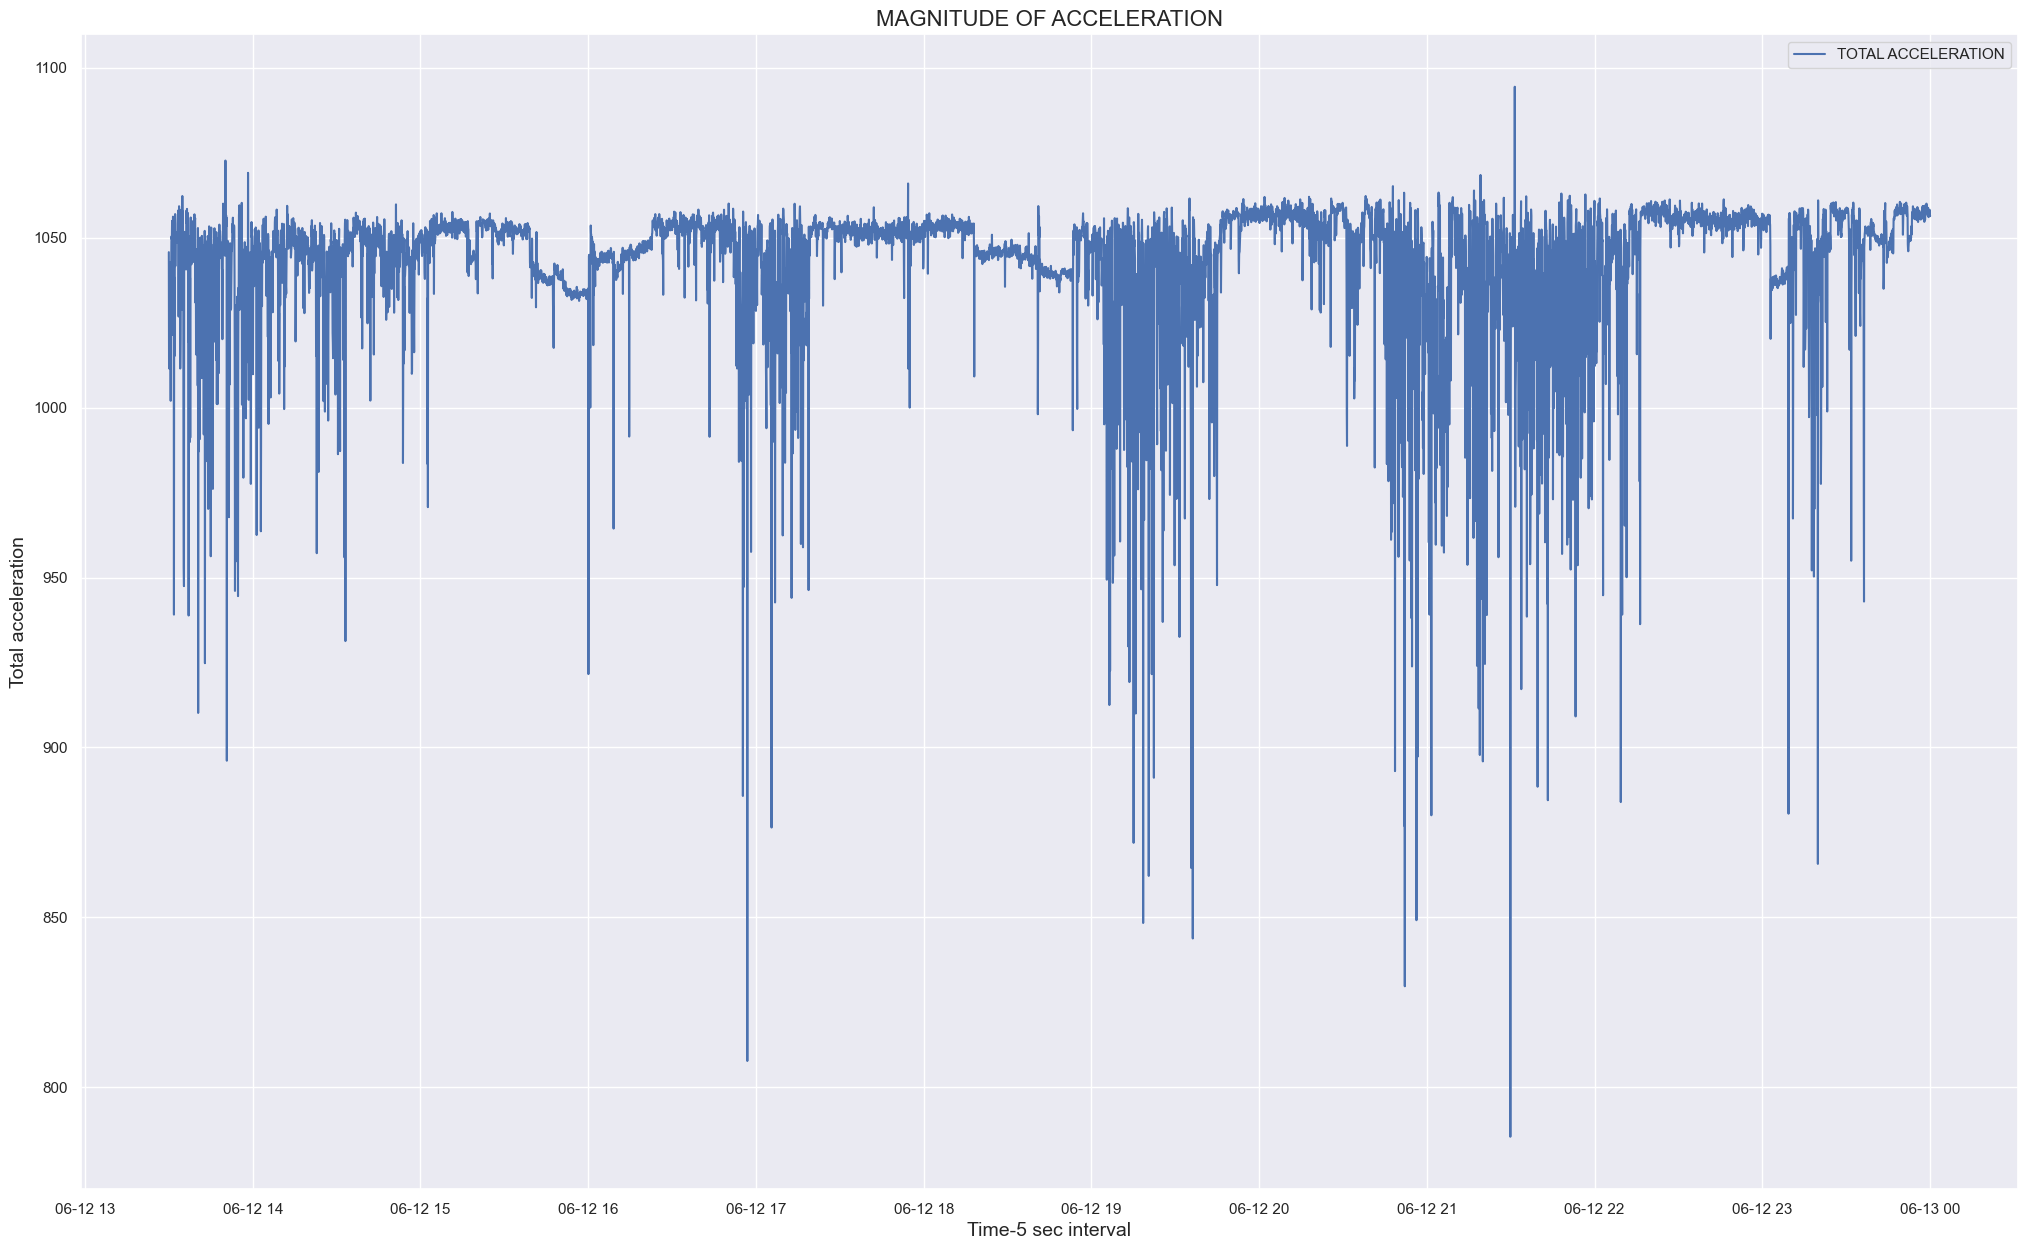

In [32]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,15))
sns.lineplot(data=df_24_hrs,x="timestamp",y="Acceleration",color='b',label='TOTAL ACCELERATION')
plt.xlabel('Time-5 sec interval', fontsize=14)
plt.ylabel('Total acceleration', fontsize=14)
plt.title('MAGNITUDE OF ACCELERATION', fontsize=16)
plt.legend()
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


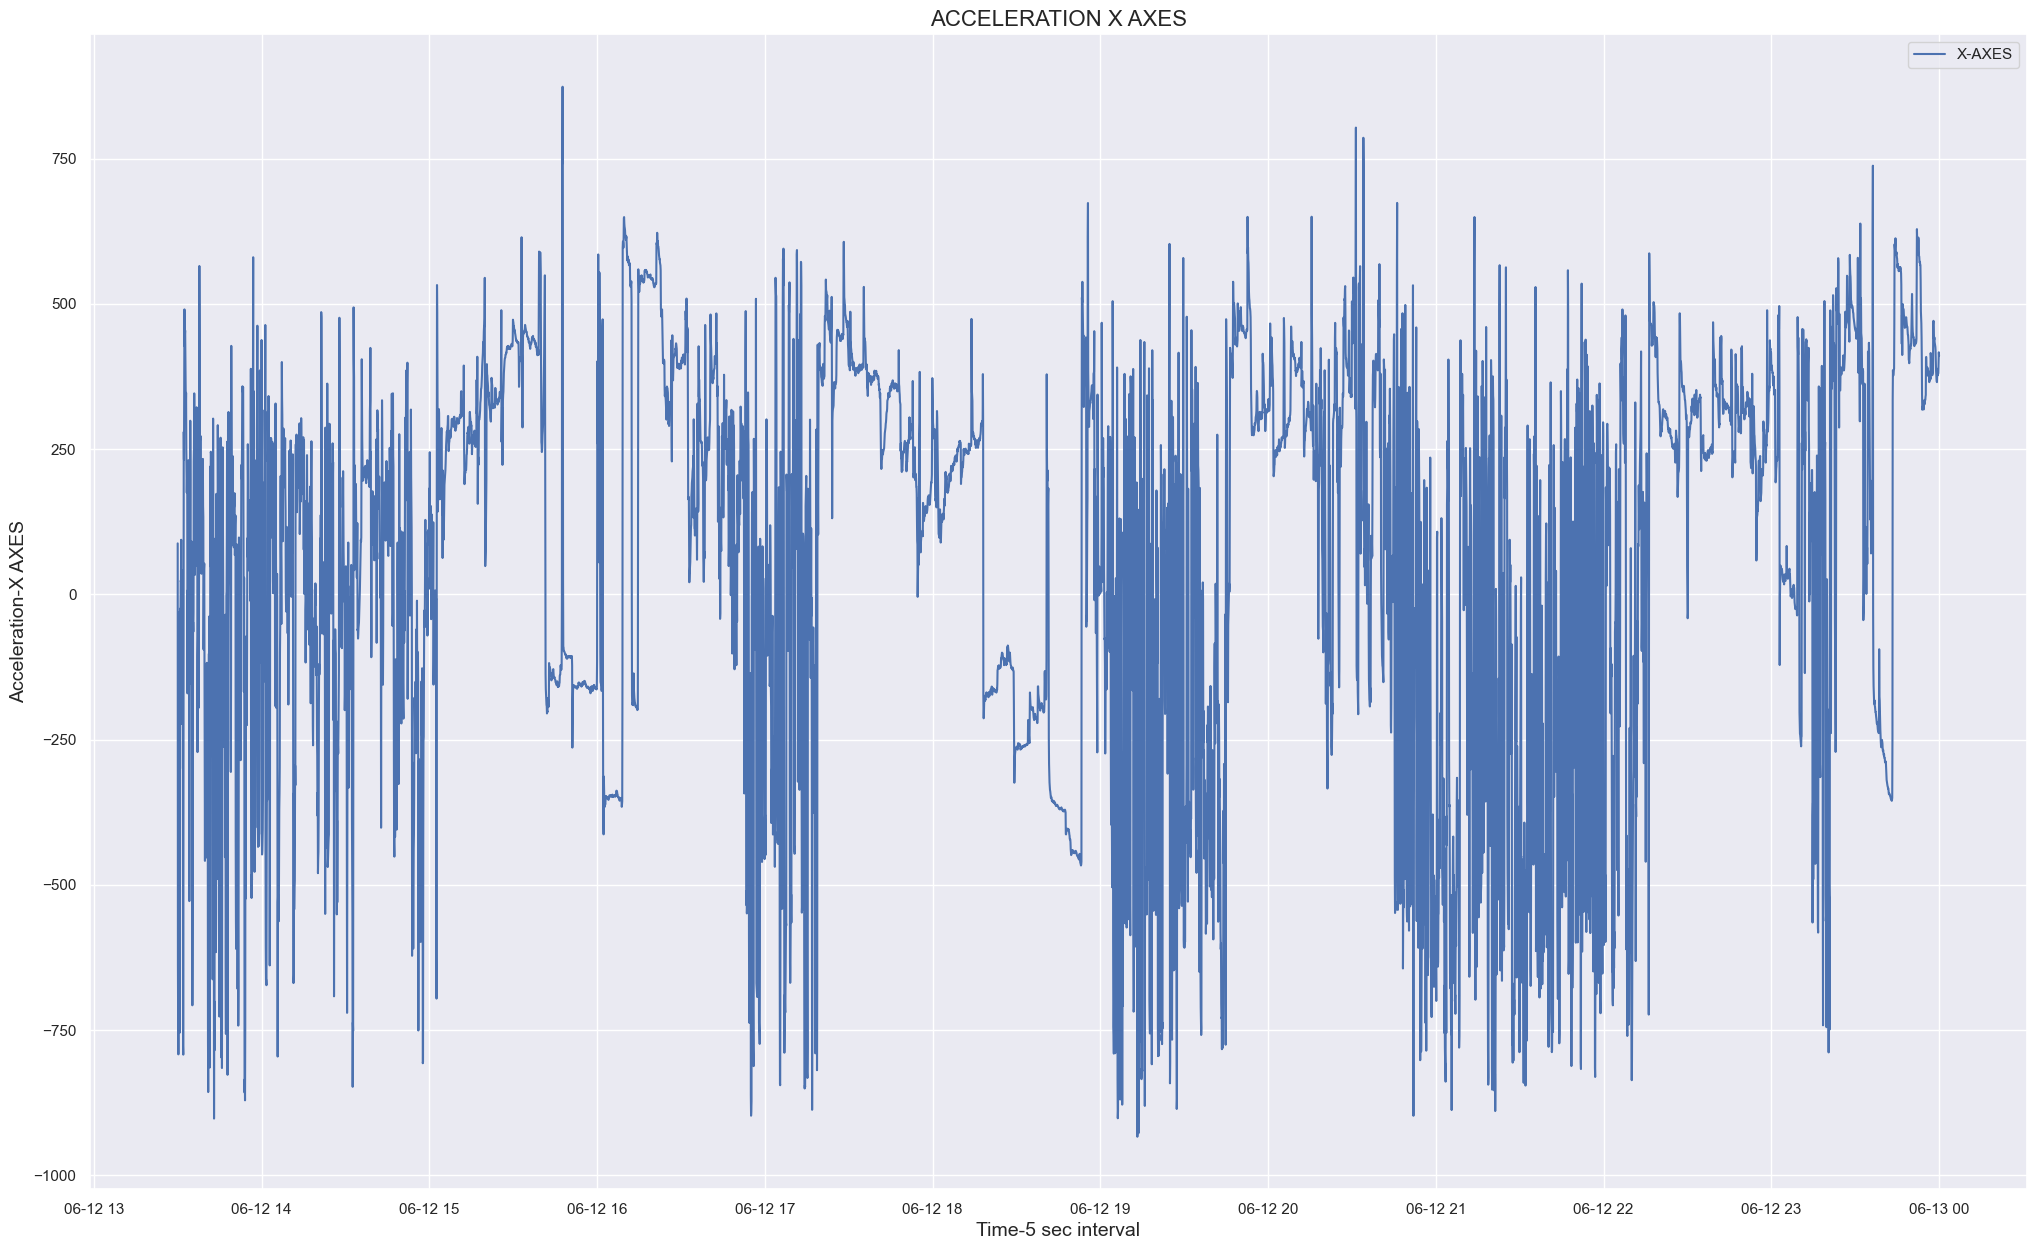

In [33]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,15))
sns.lineplot(data=df_24_hrs,x="timestamp",y="x",color='b',label='X-AXES')
plt.xlabel('Time-5 sec interval', fontsize=14)
plt.ylabel('Acceleration-X AXES', fontsize=14)
plt.title('ACCELERATION X AXES', fontsize=16)
plt.legend()
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


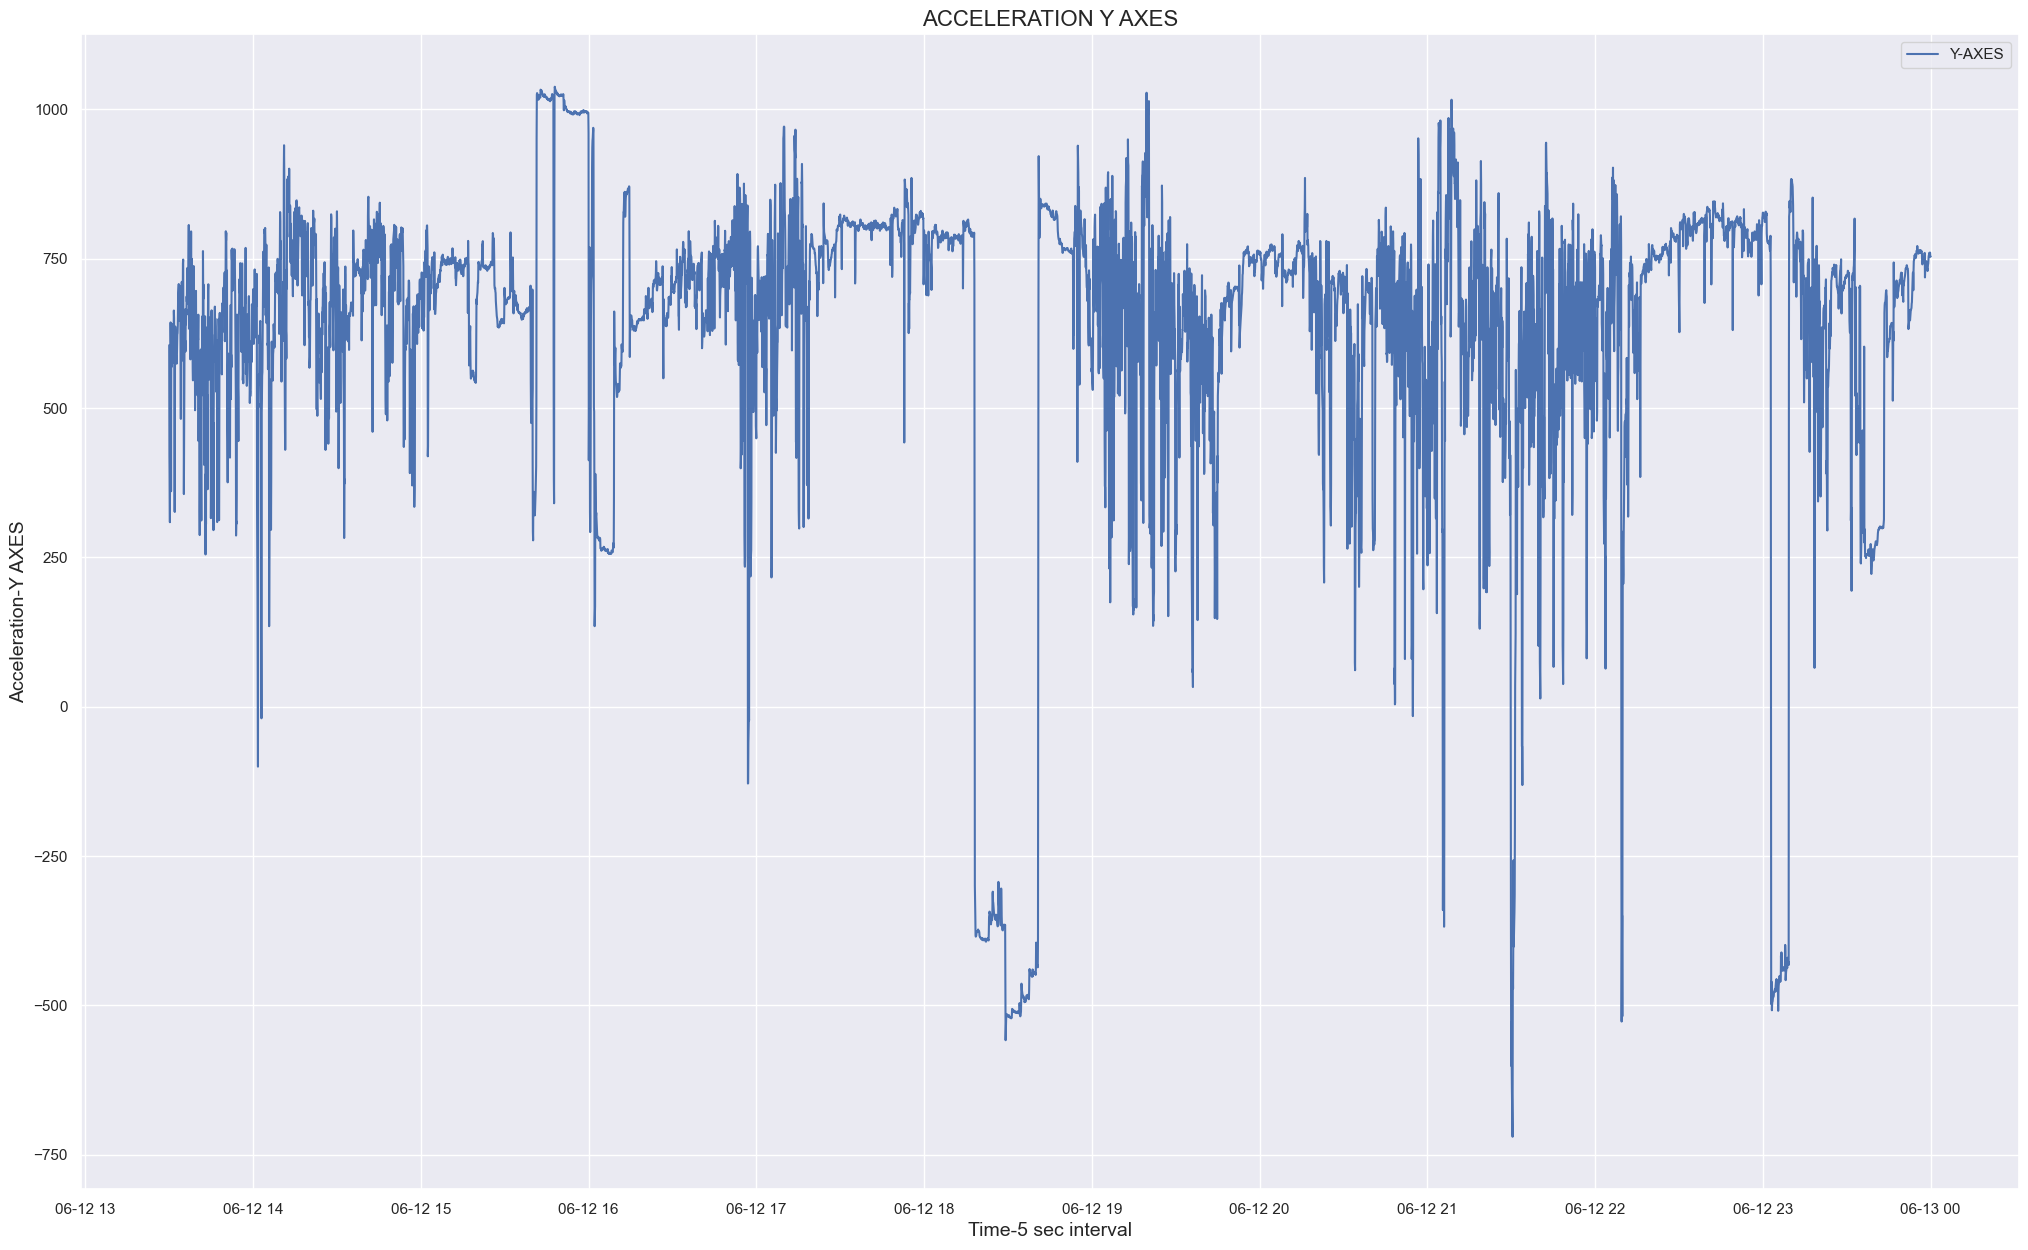

In [34]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,15))
sns.lineplot(data=df_24_hrs,x="timestamp",y="y",color='b',label='Y-AXES')
plt.xlabel('Time-5 sec interval', fontsize=14)
plt.ylabel('Acceleration-Y AXES', fontsize=14)
plt.title('ACCELERATION Y AXES', fontsize=16)
plt.legend()
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


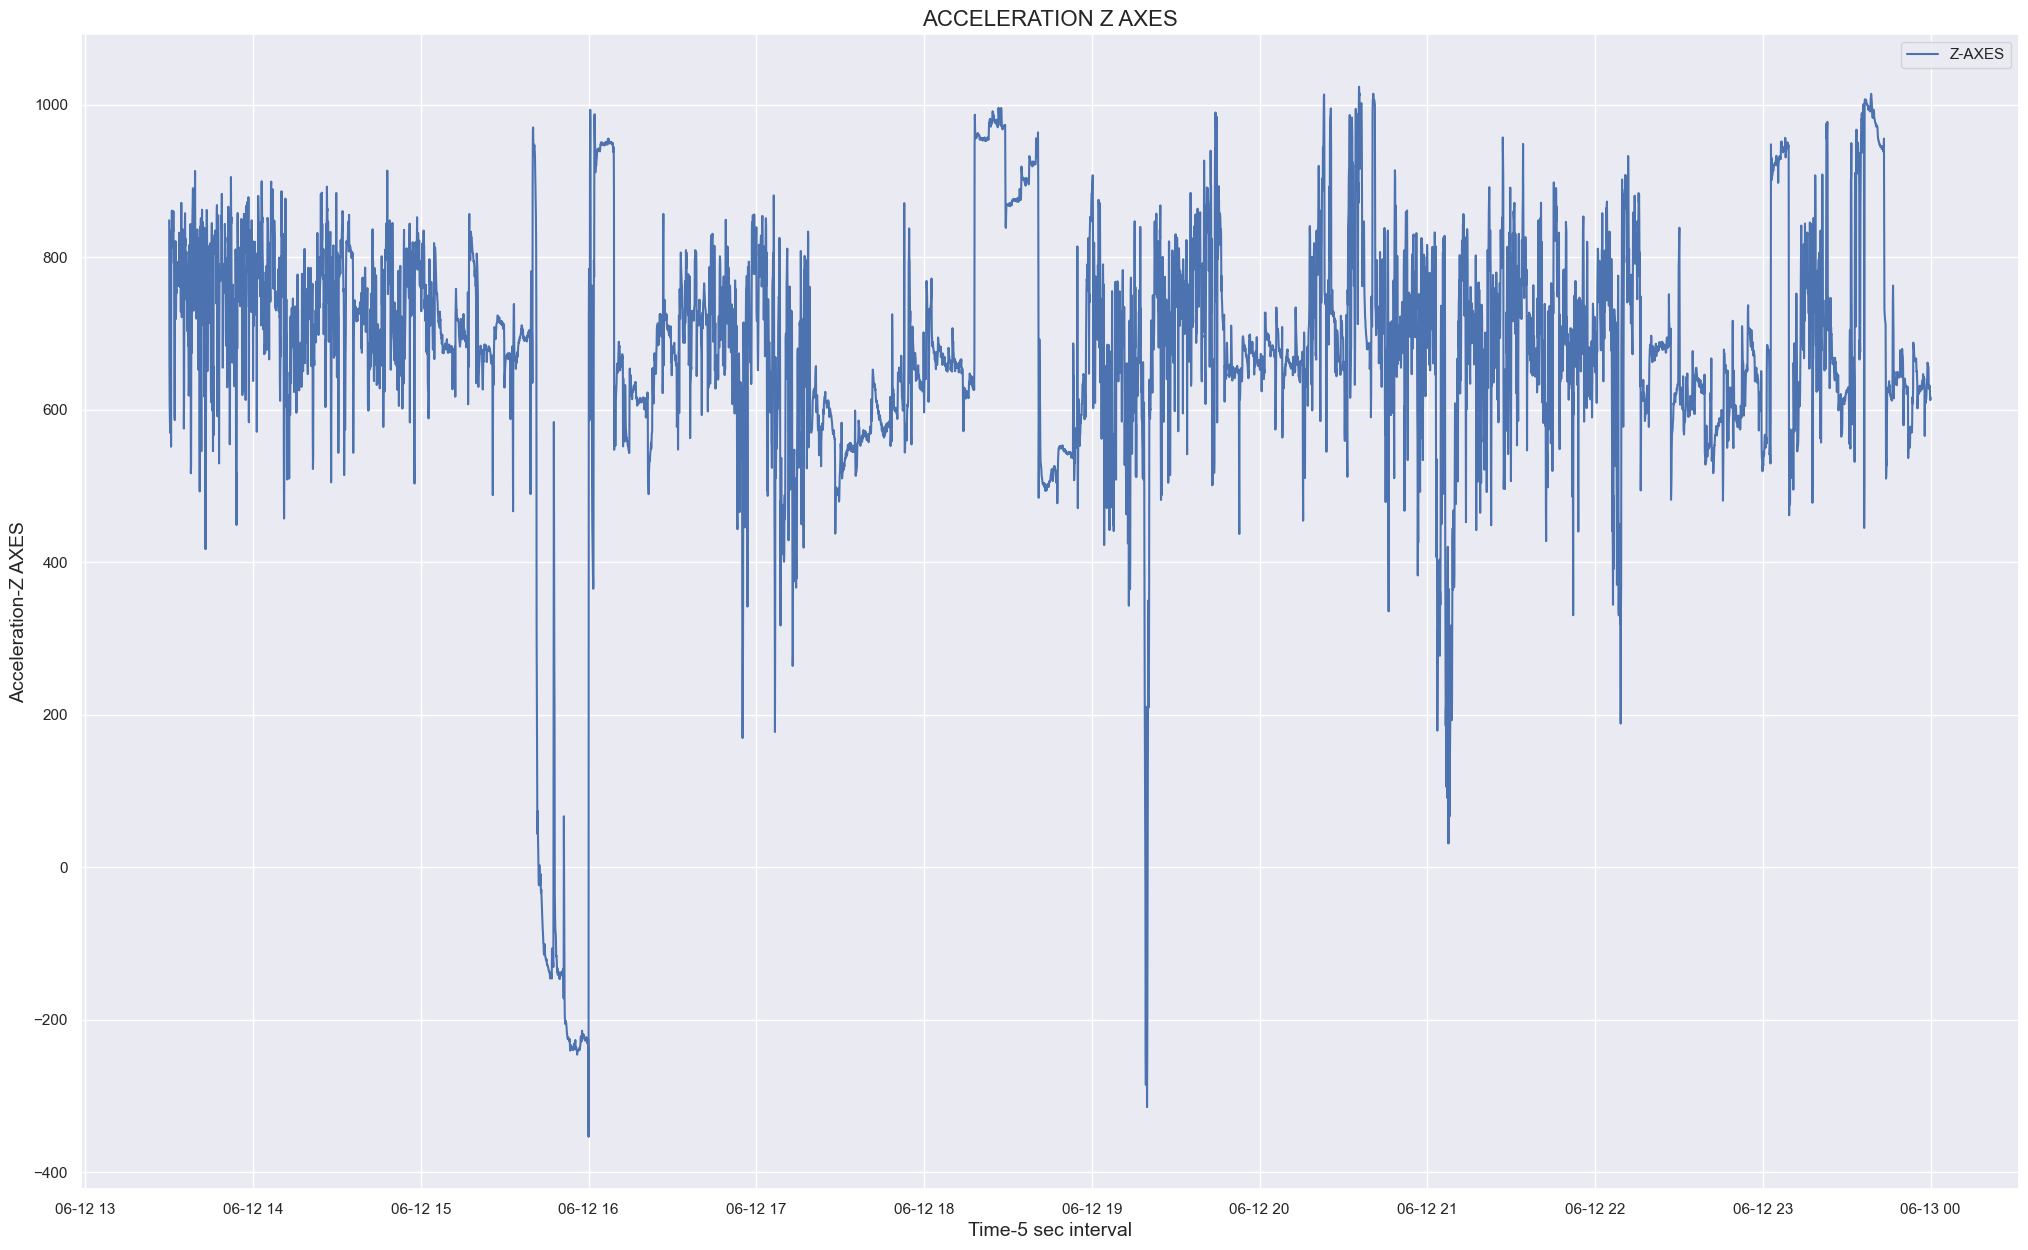

In [35]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,15))
sns.lineplot(data=df_24_hrs,x="timestamp",y="z",color='b',label='Z-AXES')
plt.xlabel('Time-5 sec interval', fontsize=14)
plt.ylabel('Acceleration-Z AXES', fontsize=14)
plt.title('ACCELERATION Z AXES', fontsize=16)
plt.legend()
plt.show()

In [36]:
st_time_1=pd.to_datetime('2015-06-12 13:30:00')

In [37]:
end_time_1=pd.to_datetime('2015-06-12 18:30:00')

In [38]:
df_1st_qtr=df_second[(df_second.index >= st_time_1) & (df_second.index <= end_time_1)]

In [39]:
df_1st_qtr

,x,y,z
timestamp,,,
2015-06-12 13:30:00,87.673469,605.142857,848.326531
2015-06-12 13:30:05,-636.480000,420.640000,664.160000
2015-06-12 13:30:10,-747.607843,375.137255,607.137255
2015-06-12 13:30:15,-791.920000,308.800000,590.480000
2015-06-12 13:30:20,-740.160000,432.400000,569.600000
...,...,...,...
2015-06-12 18:29:40,-268.240000,-515.680000,868.000000
2015-06-12 18:29:45,-263.843137,-515.607843,869.098039
2015-06-12 18:29:50,-264.480000,-516.960000,869.280000


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


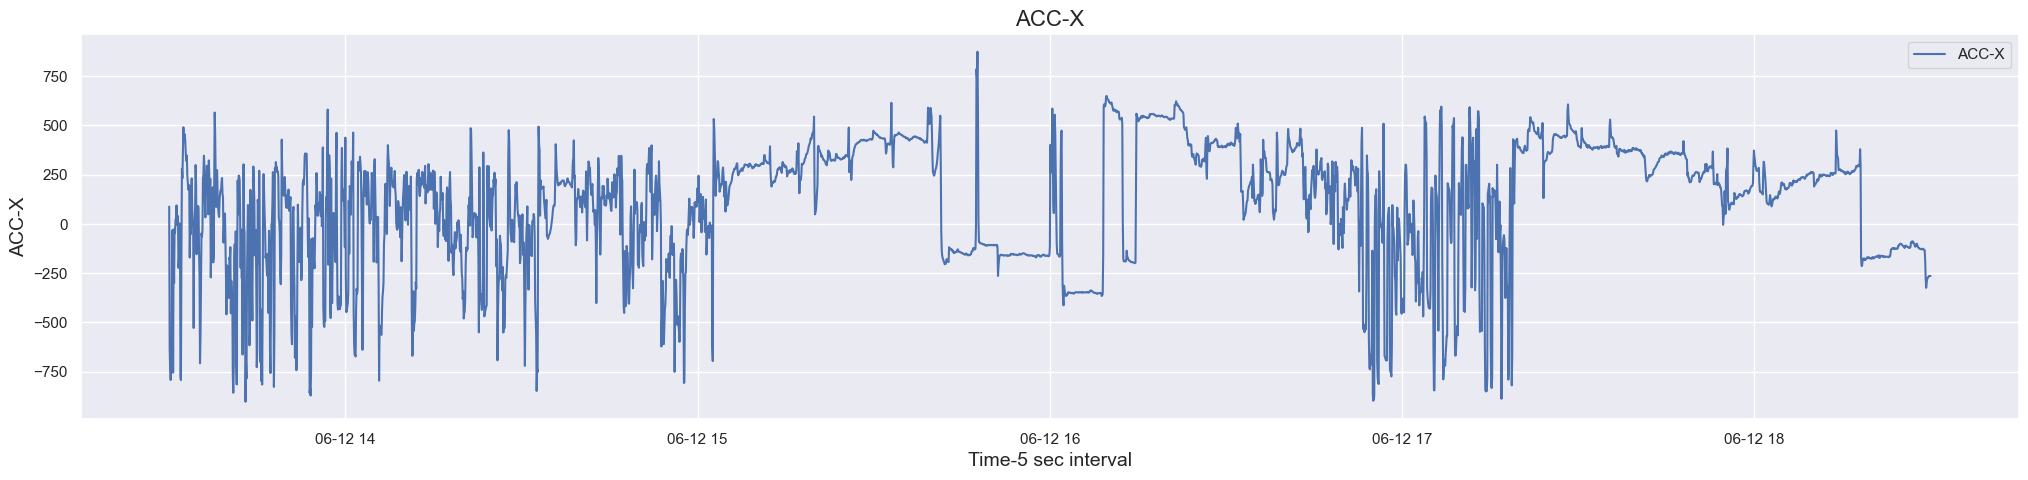

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


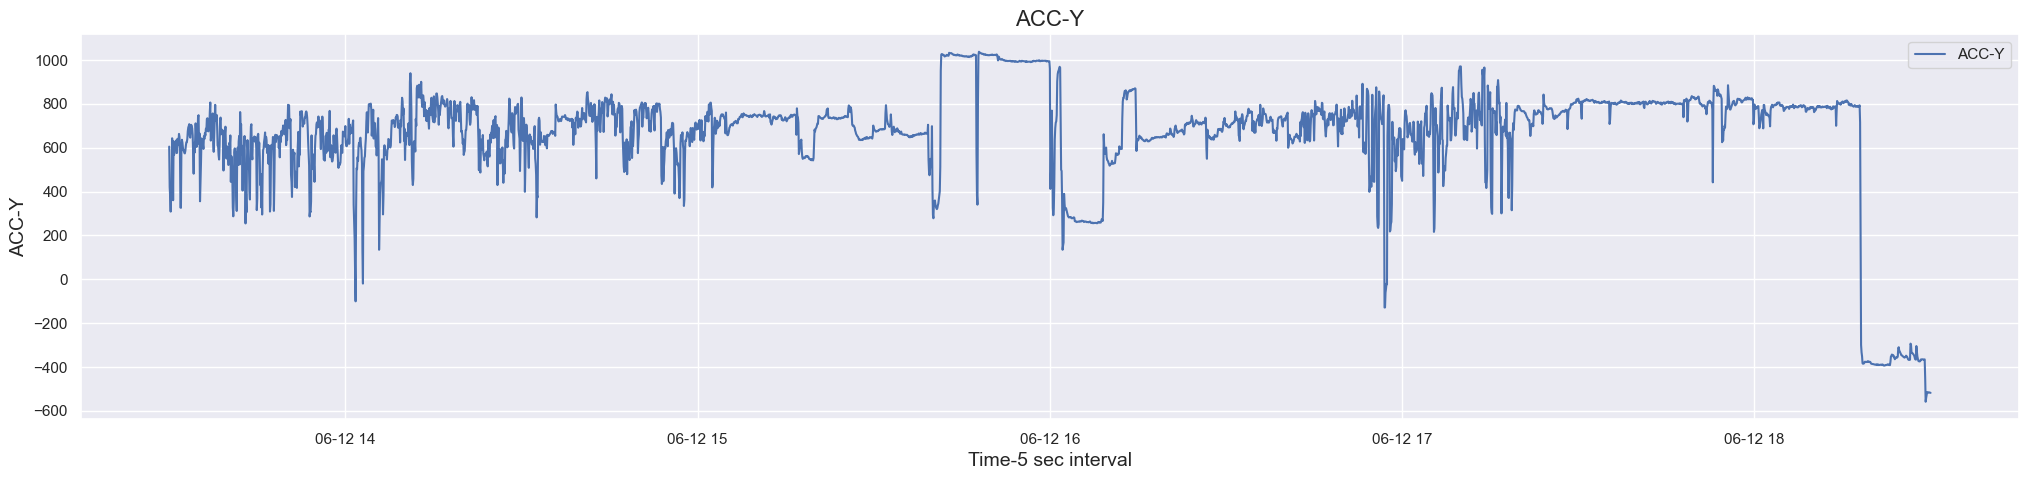

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


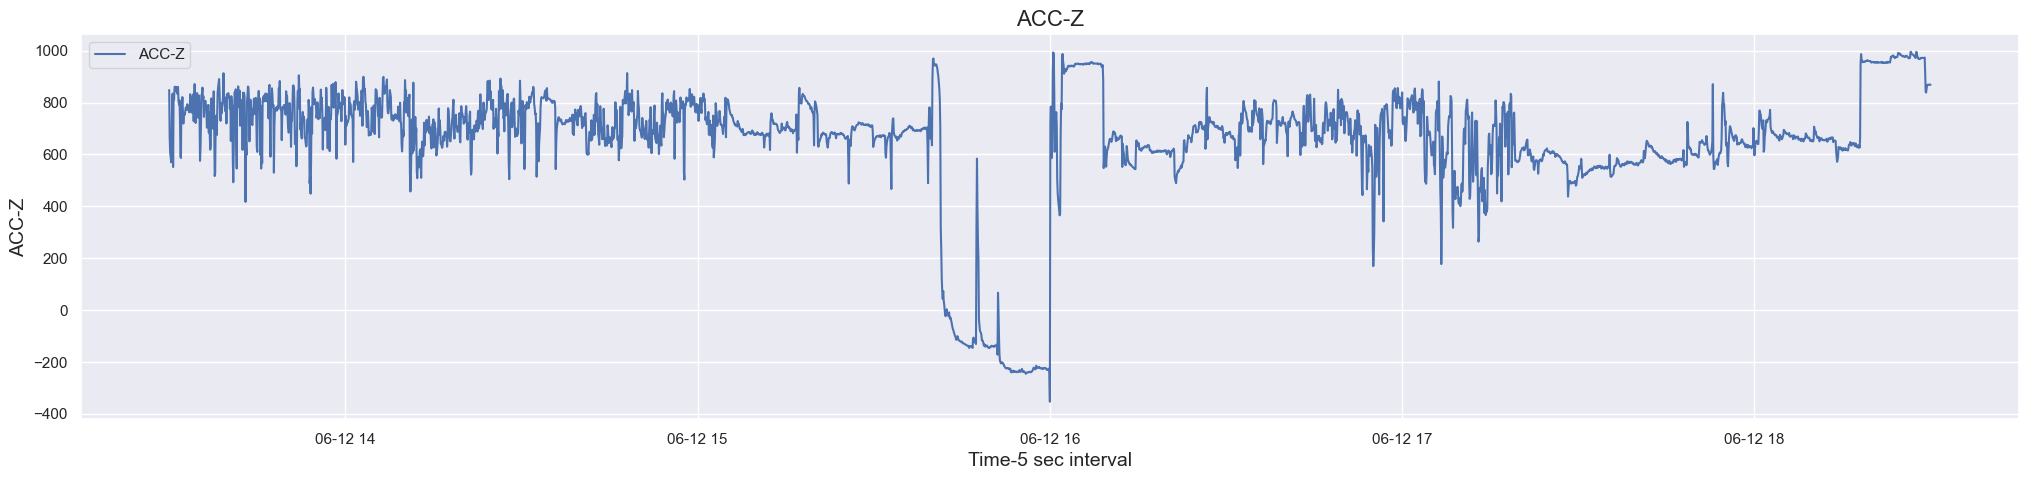

In [40]:
sns.set(style='darkgrid')
plt.figure(figsize=(25,5))
sns.lineplot(data=df_1st_qtr,x="timestamp",y="x",color='b',label='ACC-X')
plt.xlabel('Time-5 sec interval', fontsize=14)
plt.ylabel('ACC-X', fontsize=14)
plt.title('ACC-X', fontsize=16)
plt.legend()
plt.show()


sns.set(style='darkgrid')
plt.figure(figsize=(25,5))
sns.lineplot(data=df_1st_qtr,x="timestamp",y="y",color='b',label='ACC-Y')
plt.xlabel('Time-5 sec interval', fontsize=14)
plt.ylabel('ACC-Y', fontsize=14)
plt.title('ACC-Y', fontsize=16)
plt.legend()
plt.show()


sns.set(style='darkgrid')
plt.figure(figsize=(25,5))
sns.lineplot(data=df_1st_qtr,x="timestamp",y="z",color='b',label='ACC-Z')
plt.xlabel('Time-5 sec interval', fontsize=14)
plt.ylabel('ACC-Z', fontsize=14)
plt.title('ACC-Z', fontsize=16)
plt.legend()
plt.show()

In [41]:
df_24_hrs

,x,y,z,Acceleration
timestamp,,,,
2015-06-12 13:30:00,87.673469,605.142857,848.326531,1045.725785
2015-06-12 13:30:05,-636.480000,420.640000,664.160000,1011.510408
2015-06-12 13:30:10,-747.607843,375.137255,607.137255,1033.567169
2015-06-12 13:30:15,-791.920000,308.800000,590.480000,1034.969254
2015-06-12 13:30:20,-740.160000,432.400000,569.600000,1029.199080
...,...,...,...,...
2015-06-12 23:59:40,379.280000,757.760000,630.880000,1056.438882
2015-06-12 23:59:45,380.941176,759.921569,629.960784,1058.039489
2015-06-12 23:59:50,403.600000,760.160000,615.680000,1058.205107


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_24_hrs[['x','y','z','Acceleration']])





C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


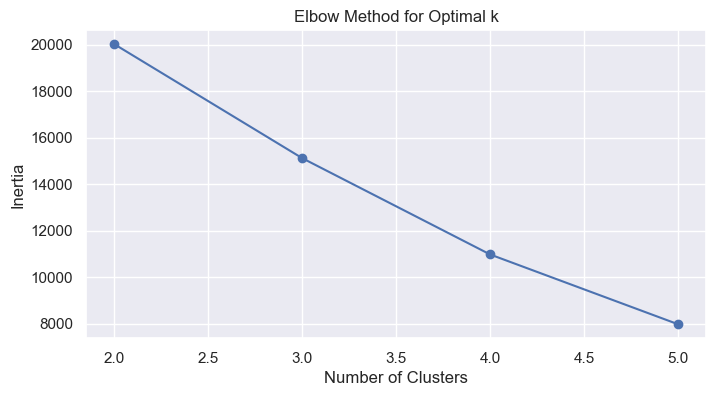

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
# Adjust the upper limit of the range of clusters
for k in range(2, 6):  # Adjusted upper limit to 6 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(range(2, 6), inertia, marker='o', linestyle='-', color='b')  # Adjusted range for plotting
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32\2361710551.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_24_hrs['cluster'] = cluster_labels


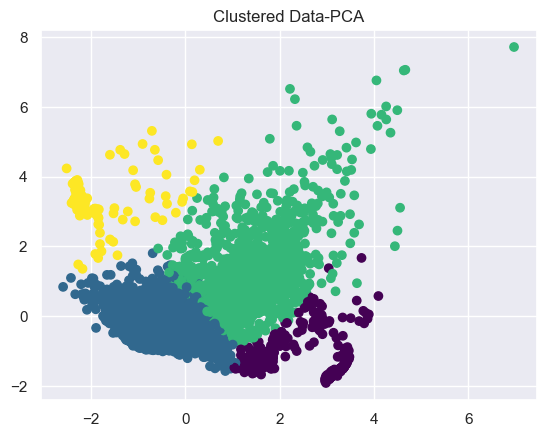

In [44]:
from sklearn.decomposition import PCA
optimal_k = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

#  add cluster labels  to  DataFrame
df_24_hrs['cluster'] = cluster_labels

# reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Visualize the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clustered Data-PCA')
plt.show()

In [45]:
# Summary of the clustering model
num_clusters=4
cluster_centers = kmeans.cluster_centers_
cluster_sizes = df_24_hrs['cluster'].value_counts()

print(f"Number of Clusters: {num_clusters}")
print("Cluster Sizes:")
print(cluster_sizes)
print("\nCluster Centers:")
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i} Center: {center}")

Number of Clusters: 4
Cluster Sizes:
cluster
1    4991
2    1656
0     658
3     256
Name: count, dtype: int64

Cluster Centers:
Cluster 0 Center: [-0.81481561 -2.63692578  1.33606103  0.04571523]
Cluster 1 Center: [0.58535324 0.35669283 0.01493024 0.38451871]
Cluster 2 Center: [-1.32911881 -0.22196771  0.06362939 -1.10106957]
Cluster 3 Center: [-0.70507671  1.26398077 -4.13715891 -0.47996526]


In [46]:
silhouette_avg = silhouette_score(df_24_hrs[['y', 'x', 'z']], df_24_hrs['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

NameError: name 'silhouette_score' is not defined

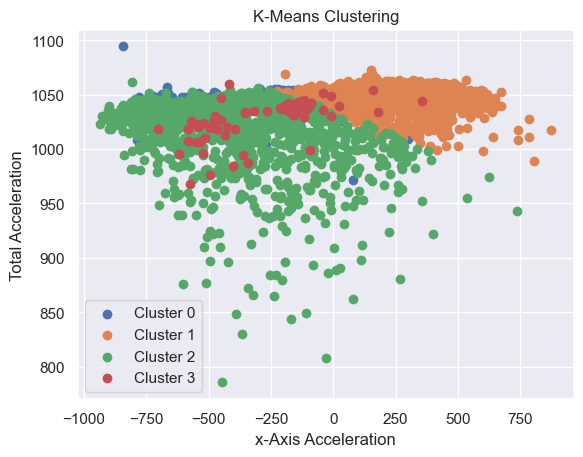

In [47]:
# Visualize the clusters (example with 2D data)
for cluster_label in range(num_clusters):
    cluster_data = df_24_hrs[df_24_hrs['cluster'] == cluster_label]
    plt.scatter(cluster_data['x'], cluster_data['Acceleration'], label=f'Cluster {cluster_label}')
plt.xlabel('x-Axis Acceleration')
plt.ylabel('Total Acceleration')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

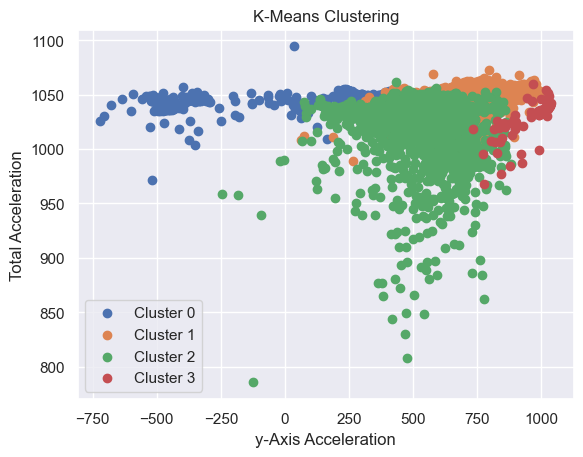

In [48]:
# Visualize the clusters (example with 2D data)
for cluster_label in range(num_clusters):
    cluster_data = df_24_hrs[df_24_hrs['cluster'] == cluster_label]
    plt.scatter(cluster_data['y'], cluster_data['Acceleration'], label=f'Cluster {cluster_label}')
plt.xlabel('y-Axis Acceleration')
plt.ylabel('Total Acceleration')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

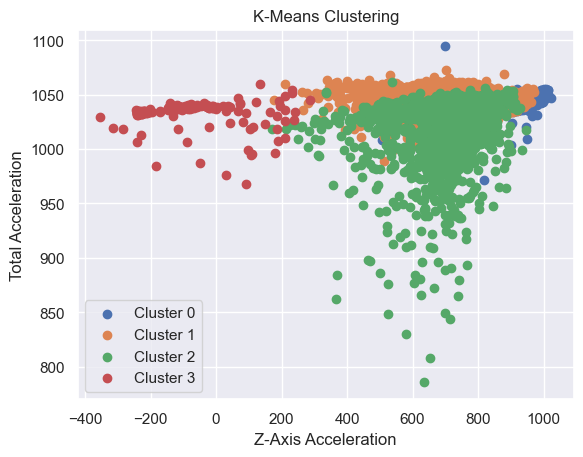

In [49]:
# Visualize the clusters (example with 2D data)
for cluster_label in range(num_clusters):
    cluster_data = df_24_hrs[df_24_hrs['cluster'] == cluster_label]
    plt.scatter(cluster_data['z'], cluster_data['Acceleration'], label=f'Cluster {cluster_label}')
plt.xlabel('Z-Axis Acceleration')
plt.ylabel('Total Acceleration')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [50]:
df_24_hrs.describe()

,x,y,z,Acceleration,cluster
count,7561.000000,7561.000000,7561.000000,7561.000000,7561.000000
mean,65.312270,625.482326,672.215366,1043.485937,1.199709
std,346.812109,290.933115,192.408234,20.350211,0.633755
min,-933.760000,-720.160000,-353.280000,785.450796,0.000000
25%,-171.120000,599.440000,617.120000,1040.225951,1.000000
50%,170.320000,709.040000,682.160000,1049.493783,1.000000
75%,336.078431,775.372549,767.440000,1054.064848,2.000000
max,873.760000,1037.882353,1023.360000,1094.398699,3.000000


In [51]:
#Finding the medians of the Features to classify the Activities.

In [52]:
cluster0_median=df_24_hrs.loc[df_24_hrs['cluster']==0,'Acceleration'].median()

In [53]:
cluster0_median

1045.1000105024498

In [54]:
cluster1_median=df_24_hrs.loc[df_24_hrs['cluster']==1,'Acceleration'].median()

In [55]:
cluster1_median

1052.7101754994108

In [56]:
cluster2_median=df_24_hrs.loc[df_24_hrs['cluster']==2,'Acceleration'].median()

In [57]:
cluster2_median

1033.2128396282733

In [58]:
cluster3_median=df_24_hrs.loc[df_24_hrs['cluster']==3,'Acceleration'].median()

In [59]:
cluster3_median

1034.9201244353676

In [60]:
df_24_hrs['Activity'] = None
df_24_hrs.loc[df_24_hrs['cluster'] == 1, 'Activity'] = 'Rumination'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_32\2472108474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_24_hrs['Activity'] = None


In [61]:
df_24_hrs

,x,y,z,Acceleration,cluster,Activity
timestamp,,,,,,
2015-06-12 13:30:00,87.673469,605.142857,848.326531,1045.725785,1,Rumination
2015-06-12 13:30:05,-636.480000,420.640000,664.160000,1011.510408,2,None
2015-06-12 13:30:10,-747.607843,375.137255,607.137255,1033.567169,2,None
2015-06-12 13:30:15,-791.920000,308.800000,590.480000,1034.969254,2,None
2015-06-12 13:30:20,-740.160000,432.400000,569.600000,1029.199080,2,None
...,...,...,...,...,...,...
2015-06-12 23:59:40,379.280000,757.760000,630.880000,1056.438882,1,Rumination
2015-06-12 23:59:45,380.941176,759.921569,629.960784,1058.039489,1,Rumination
2015-06-12 23:59:50,403.600000,760.160000,615.680000,1058.205107,1,Rumination


In [62]:
df_24_hrs.loc[df_24_hrs['cluster'] == 2, 'Activity'] = 'Eating'

In [63]:
df_24_hrs.loc[df_24_hrs['cluster'] == 3, 'Activity'] = 'Resting'

In [64]:
df_24_hrs.loc[df_24_hrs['cluster'] == 0, 'Activity'] = 'Standing'

<Axes: xlabel='Activity'>

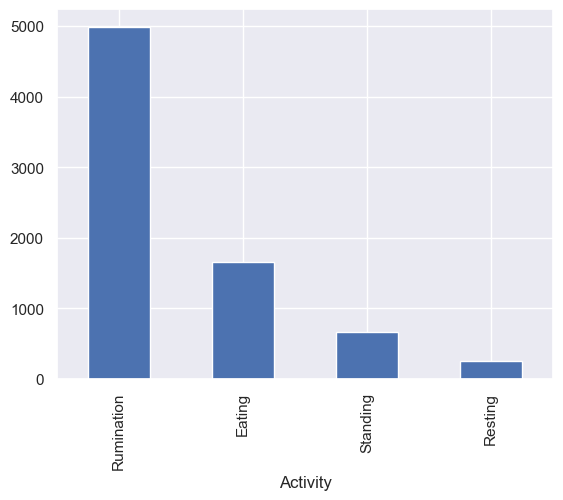

In [65]:
df_24_hrs['Activity'].value_counts().plot(kind='bar')

In [66]:
#MIlestone 4
#Multi Class Classification Model
#1.logistic regression

In [67]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay




In [68]:
x=df_24_hrs.drop(['cluster','Activity'],axis=1)

y=df_24_hrs['cluster']



In [69]:
print(x)

                              x           y           z  Acceleration
timestamp                                                            
2015-06-12 13:30:00   87.673469  605.142857  848.326531   1045.725785
2015-06-12 13:30:05 -636.480000  420.640000  664.160000   1011.510408
2015-06-12 13:30:10 -747.607843  375.137255  607.137255   1033.567169
2015-06-12 13:30:15 -791.920000  308.800000  590.480000   1034.969254
2015-06-12 13:30:20 -740.160000  432.400000  569.600000   1029.199080
...                         ...         ...         ...           ...
2015-06-12 23:59:40  379.280000  757.760000  630.880000   1056.438882
2015-06-12 23:59:45  380.941176  759.921569  629.960784   1058.039489
2015-06-12 23:59:50  403.600000  760.160000  615.680000   1058.205107
2015-06-12 23:59:55  416.640000  753.040000  612.480000   1056.309558
2015-06-13 00:00:00  410.400000  753.520000  616.240000   1056.395895

[7561 rows x 4 columns]


In [70]:
print(y)

timestamp
2015-06-12 13:30:00    1
2015-06-12 13:30:05    2
2015-06-12 13:30:10    2
2015-06-12 13:30:15    2
2015-06-12 13:30:20    2
                      ..
2015-06-12 23:59:40    1
2015-06-12 23:59:45    1
2015-06-12 23:59:50    1
2015-06-12 23:59:55    1
2015-06-13 00:00:00    1
Freq: 5S, Name: cluster, Length: 7561, dtype: int32


In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [72]:
print(x_train)

                              x           y           z  Acceleration
timestamp                                                            
2015-06-12 14:32:10   36.640000  681.120000  793.040000   1046.030299
2015-06-12 22:15:40   68.392157  579.921569  871.843137   1049.331677
2015-06-12 16:24:35  332.627451  702.666667  710.196078   1052.976702
2015-06-12 19:00:55   86.800000  693.120000  778.560000   1045.994860
2015-06-12 16:32:00  509.120000  732.000000  547.600000   1046.371318
...                         ...         ...         ...           ...
2015-06-12 20:42:35  -33.120000  771.520000  719.200000   1055.267115
2015-06-12 20:45:30 -528.800000  592.080000  672.400000   1040.341255
2015-06-12 20:59:10 -483.280000  568.320000  698.400000   1021.914742
2015-06-12 14:41:40  284.320000  746.480000  685.040000   1052.307015
2015-06-12 23:35:50   71.600000  332.640000  991.360000   1048.127177

[6048 rows x 4 columns]


In [73]:
print(y_train)

timestamp
2015-06-12 14:32:10    1
2015-06-12 22:15:40    1
2015-06-12 16:24:35    1
2015-06-12 19:00:55    1
2015-06-12 16:32:00    1
                      ..
2015-06-12 20:42:35    1
2015-06-12 20:45:30    2
2015-06-12 20:59:10    2
2015-06-12 14:41:40    1
2015-06-12 23:35:50    0
Name: cluster, Length: 6048, dtype: int32


In [74]:

print(x_test)

                              x           y           z  Acceleration
timestamp                                                            
2015-06-12 23:03:35   40.080000 -488.960000  915.120000   1038.331788
2015-06-12 22:36:30  230.880000  807.440000  642.080000   1057.133698
2015-06-12 13:51:55   97.840000  611.920000  845.600000   1048.359725
2015-06-12 14:27:50  476.080000  730.880000  568.880000   1041.375146
2015-06-12 16:38:40  463.680000  688.720000  644.080000   1050.796568
...                         ...         ...         ...           ...
2015-06-12 23:18:40  303.200000  674.560000  729.440000   1038.770498
2015-06-12 21:35:25  188.240000  692.080000  765.920000   1049.305709
2015-06-12 23:20:15 -198.480000  641.360000  805.920000   1048.925167
2015-06-12 18:23:10 -154.509804 -376.470588  963.215686   1045.651874
2015-06-12 16:53:00  146.480000  732.960000  682.640000   1012.266823

[1513 rows x 4 columns]


In [75]:
print(y_test)

timestamp
2015-06-12 23:03:35    0
2015-06-12 22:36:30    1
2015-06-12 13:51:55    1
2015-06-12 14:27:50    1
2015-06-12 16:38:40    1
                      ..
2015-06-12 23:18:40    1
2015-06-12 21:35:25    1
2015-06-12 23:20:15    1
2015-06-12 18:23:10    0
2015-06-12 16:53:00    2
Name: cluster, Length: 1513, dtype: int32


In [76]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into train and test sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Initialize Logistic Regression classifier
lr = LogisticRegression()

# Train the classifier
lr.fit(x_train, y_train)

# Make predictions on the training set
train_predictions = lr.predict(x_train)

# Compute training accuracy
train_accuracy = accuracy_score(y_train, train_predictions)

# Make predictions on the test set
test_predictions = lr.predict(x_test)

# Compute test accuracy
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)





C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.9503968253968254
Test Accuracy: 0.9550561797752809


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 800x600 with 0 Axes>

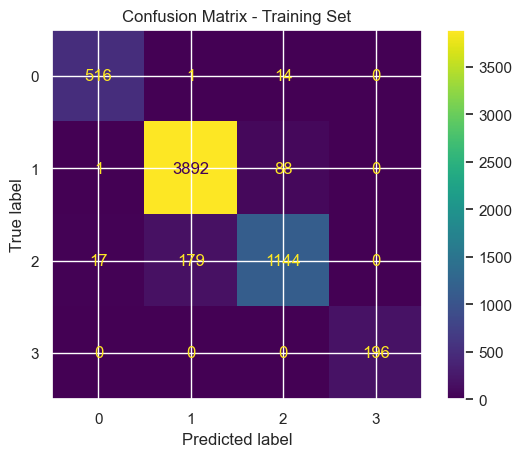

<Figure size 800x600 with 0 Axes>

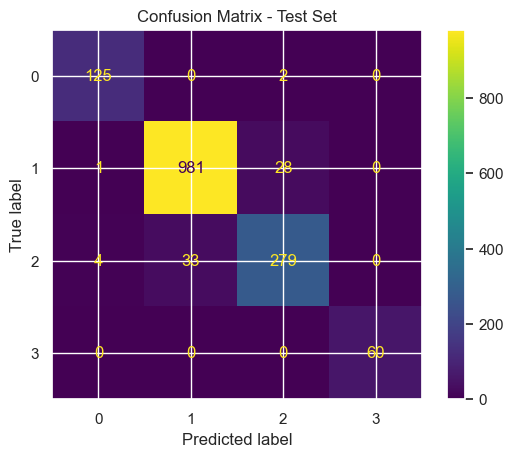

In [77]:
#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix for training set
train_cm = confusion_matrix(y_train, train_predictions)

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=lr.classes_).plot()
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Compute confusion matrix for test set
test_cm = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=lr.classes_).plot()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming you already have your data loaded into X and y

# Split data into train and test sets
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.9933906146728354
Precision: 0.9934415408814348
Recall: 0.9933906146728354
F1 Score: 0.993401640597772
Confusion Matrix:
[[ 127    0    0    0]
 [   1 1004    5    0]
 [   2    2  312    0]
 [   0    0    0   60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       1.00      0.99      1.00      1010
           2       0.98      0.99      0.99       316
           3       1.00      1.00      1.00        60

    accuracy                           0.99      1513
   macro avg       0.99      1.00      0.99      1513
weighted avg       0.99      0.99      0.99      1513



In [82]:
#multi class classification confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(x_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract true positives, true negatives, false positives, false negatives
true_positives = conf_matrix[1, 1]  # Predicted positive and actually positive
true_negatives = conf_matrix[0, 0]  # Predicted negative and actually negative
false_positives = conf_matrix[0, 1]  # Predicted positive but actually negative
false_negatives = conf_matrix[1, 0]  # Predicted negative but actually positive

print("True Positives:", true_positives)
print("True Negatives:", true_negatives)
print("False Positives:", false_positives)
print("False Negatives:", false_negatives)


True Positives: 981
True Negatives: 125
False Positives: 0
False Negatives: 1


In [83]:
def classify_rumination(tp, tn, fp, fn):
    # Determine if rumination behavior is present based on true positives
    if tp > 0:
        return True
    else:
        return False

# Example values
true_positives = 981
true_negatives = 125
false_positives = 0
false_negatives = 1

# Classify rumination behavior
rumination_present = classify_rumination(true_positives, true_negatives, false_positives, false_negatives)

# Output the result
if rumination_present:
    print("Rumination behavior is present.")
else:
    print("No rumination behavior detected.")


Rumination behavior is present.


In [84]:
#2 Random Foresat Model

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [86]:
x=df_24_hrs.drop(['cluster','Activity'],axis=1)
y=df_24_hrs['cluster']

In [87]:
print(x)

                              x           y           z  Acceleration
timestamp                                                            
2015-06-12 13:30:00   87.673469  605.142857  848.326531   1045.725785
2015-06-12 13:30:05 -636.480000  420.640000  664.160000   1011.510408
2015-06-12 13:30:10 -747.607843  375.137255  607.137255   1033.567169
2015-06-12 13:30:15 -791.920000  308.800000  590.480000   1034.969254
2015-06-12 13:30:20 -740.160000  432.400000  569.600000   1029.199080
...                         ...         ...         ...           ...
2015-06-12 23:59:40  379.280000  757.760000  630.880000   1056.438882
2015-06-12 23:59:45  380.941176  759.921569  629.960784   1058.039489
2015-06-12 23:59:50  403.600000  760.160000  615.680000   1058.205107
2015-06-12 23:59:55  416.640000  753.040000  612.480000   1056.309558
2015-06-13 00:00:00  410.400000  753.520000  616.240000   1056.395895

[7561 rows x 4 columns]


In [88]:
print(y)

timestamp
2015-06-12 13:30:00    1
2015-06-12 13:30:05    2
2015-06-12 13:30:10    2
2015-06-12 13:30:15    2
2015-06-12 13:30:20    2
                      ..
2015-06-12 23:59:40    1
2015-06-12 23:59:45    1
2015-06-12 23:59:50    1
2015-06-12 23:59:55    1
2015-06-13 00:00:00    1
Freq: 5S, Name: cluster, Length: 7561, dtype: int32


In [89]:
from sklearn.model_selection import train_test_split

# Assuming X and y have the same number of samples
# If not, adjust to ensure alignment
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x, y, test_size=0.25, random_state=123)


In [90]:
print(x_train)

                              x           y           z  Acceleration
timestamp                                                            
2015-06-12 14:32:10   36.640000  681.120000  793.040000   1046.030299
2015-06-12 22:15:40   68.392157  579.921569  871.843137   1049.331677
2015-06-12 16:24:35  332.627451  702.666667  710.196078   1052.976702
2015-06-12 19:00:55   86.800000  693.120000  778.560000   1045.994860
2015-06-12 16:32:00  509.120000  732.000000  547.600000   1046.371318
...                         ...         ...         ...           ...
2015-06-12 20:42:35  -33.120000  771.520000  719.200000   1055.267115
2015-06-12 20:45:30 -528.800000  592.080000  672.400000   1040.341255
2015-06-12 20:59:10 -483.280000  568.320000  698.400000   1021.914742
2015-06-12 14:41:40  284.320000  746.480000  685.040000   1052.307015
2015-06-12 23:35:50   71.600000  332.640000  991.360000   1048.127177

[6048 rows x 4 columns]


In [91]:
x_test

,x,y,z,Acceleration
timestamp,,,,
2015-06-12 23:03:35,40.080000,-488.960000,915.120000,1038.331788
2015-06-12 22:36:30,230.880000,807.440000,642.080000,1057.133698
2015-06-12 13:51:55,97.840000,611.920000,845.600000,1048.359725
2015-06-12 14:27:50,476.080000,730.880000,568.880000,1041.375146
2015-06-12 16:38:40,463.680000,688.720000,644.080000,1050.796568
...,...,...,...,...
2015-06-12 23:18:40,303.200000,674.560000,729.440000,1038.770498
2015-06-12 21:35:25,188.240000,692.080000,765.920000,1049.305709
2015-06-12 23:20:15,-198.480000,641.360000,805.920000,1048.925167


In [92]:
y_test

timestamp
2015-06-12 23:03:35    0
2015-06-12 22:36:30    1
2015-06-12 13:51:55    1
2015-06-12 14:27:50    1
2015-06-12 16:38:40    1
                      ..
2015-06-12 23:18:40    1
2015-06-12 21:35:25    1
2015-06-12 23:20:15    1
2015-06-12 18:23:10    0
2015-06-12 16:53:00    2
Name: cluster, Length: 1513, dtype: int32

In [93]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [94]:
y_pred=rf.predict(x_test)

In [95]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9947124917382684


In [96]:
rtrain_yhat=rf.predict(x_train)
train_acc=accuracy_score(y_train,rtrain_yhat)

print("Train Accuracy:",train_acc)
print("Test Accuaracy",accuracy)

Train Accuracy: 1.0
Test Accuaracy 0.9947124917382684


<Figure size 800x600 with 0 Axes>

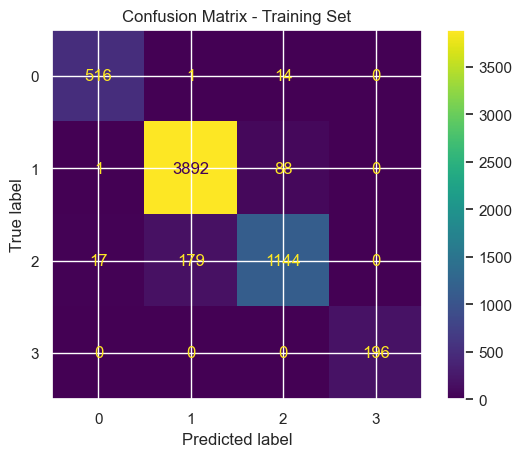

<Figure size 800x600 with 0 Axes>

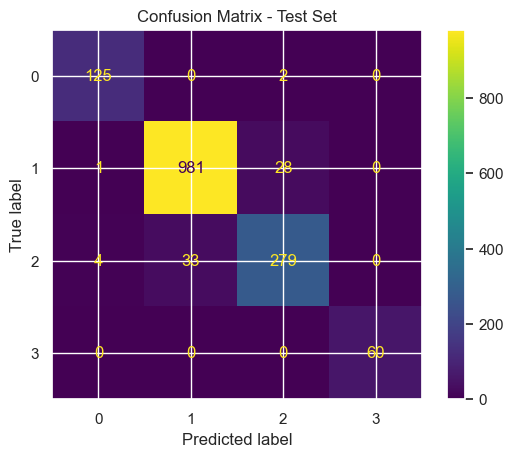

In [97]:

#confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix for training set
train_cm = confusion_matrix(y_train, train_predictions)

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=lr.classes_).plot()
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Compute confusion matrix for test set
test_cm = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=lr.classes_).plot()
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Assuming you already have your data loaded into X and y

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.9933906146728354
Precision: 0.9934415408814348
Recall: 0.9933906146728354
F1 Score: 0.993401640597772
Confusion Matrix:
[[ 127    0    0    0]
 [   1 1004    5    0]
 [   2    2  312    0]
 [   0    0    0   60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       1.00      0.99      1.00      1010
           2       0.98      0.99      0.99       316
           3       1.00      1.00      1.00        60

    accuracy                           0.99      1513
   macro avg       0.99      1.00      0.99      1513
weighted avg       0.99      0.99      0.99      1513



In [99]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Extract TP, TN, FP, FN from confusion matrix
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)


True Positives: 981
True Negatives: 125
False Positives: 0
False Negatives: 1


In [100]:
def classify_rumination(tp, tn, fp, fn):
    # Determine if rumination behavior is present based on true positives
    if tp > 0:
        return True
    else:
        return False

# Example values
true_positives = 981
true_negatives = 125
false_positives = 0
false_negatives = 1

# Classify rumination behavior
rumination_present = classify_rumination(true_positives, true_negatives, false_positives, false_negatives)

# Output the result
if rumination_present:
    print("Rumination behavior is present.")
else:
    print("No rumination behavior detected.")


Rumination behavior is present.
